# Pharmaceutical Sales prediction across multiple stores


# Explanatory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
store_data = pd.read_csv("store.csv")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submission_data = pd.read_csv("sample_submission.csv")

In [3]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [7]:
# check missing values
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [8]:
# train data
train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
# check missing values for train data
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
#test data
test_data.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [11]:
# check missing values for test data
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [12]:
# sample submission data
submission_data.head(5)

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [13]:
# check missing values
submission_data.isnull().sum()

Id       0
Sales    0
dtype: int64

In [14]:
# columns for each data
print(f'\t Store Columns \n{list(store_data.columns)}\n')
print(f'\t Train Columns \n{list(train_data.columns)}\n')
print(f'\t Test Columns\n {list(test_data.columns)}\n')
print(f'\t Submission Columns\n {list(submission_data.columns)}')

	 Store Columns 
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

	 Train Columns 
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

	 Test Columns
 ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

	 Submission Columns
 ['Id', 'Sales']


In [15]:
# shape for each data
print(f'\t Store shape: {store_data.shape}\n')
print(f'\t Train shape: {train_data.shape}\n')
print(f'\t Test shape: {test_data.shape}\n')
print(f'\t Submission shape: {submission_data.shape}')

	 Store shape: (1115, 10)

	 Train shape: (1017209, 9)

	 Test shape: (41088, 8)

	 Submission shape: (41088, 2)


In [16]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df, data_type):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print(f"The {data_type} dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(train_data, 'train')
percent_missing(test_data, 'test')

The train dataset contains 0.0 % missing values.
The test dataset contains 0.0 % missing values.


In [17]:
# drop missing value
test_data = test_data.dropna()
treain_data = train_data.dropna()

In [18]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
train_data = pd.merge(train_data, store_data, how = 'inner', on = 'Store')

print("In total: ", train_data.shape)
train_data.head()

Joining train set with an additional store information.
In total:  (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


# Check for seasonality in both training and test sets - are the seasons similar between these two groups?

In [19]:
time_series_train = train_data[['Date','Sales']]

In [20]:
time_series_train.head()

,Date,Sales
0,2015-07-31,5263
1,2015-07-30,5020
2,2015-07-29,4782
3,2015-07-28,5011
4,2015-07-27,6102


In [21]:
time_series_train['datetime'] = pd.to_datetime(time_series_train['Date'])
time_series_train = time_series_train.set_index('datetime')
time_series_train.drop(['Date'], axis=1, inplace=True)
time_series_train.head()

,Sales
datetime,
2015-07-31,5263
2015-07-30,5020
2015-07-29,4782
2015-07-28,5011
2015-07-27,6102


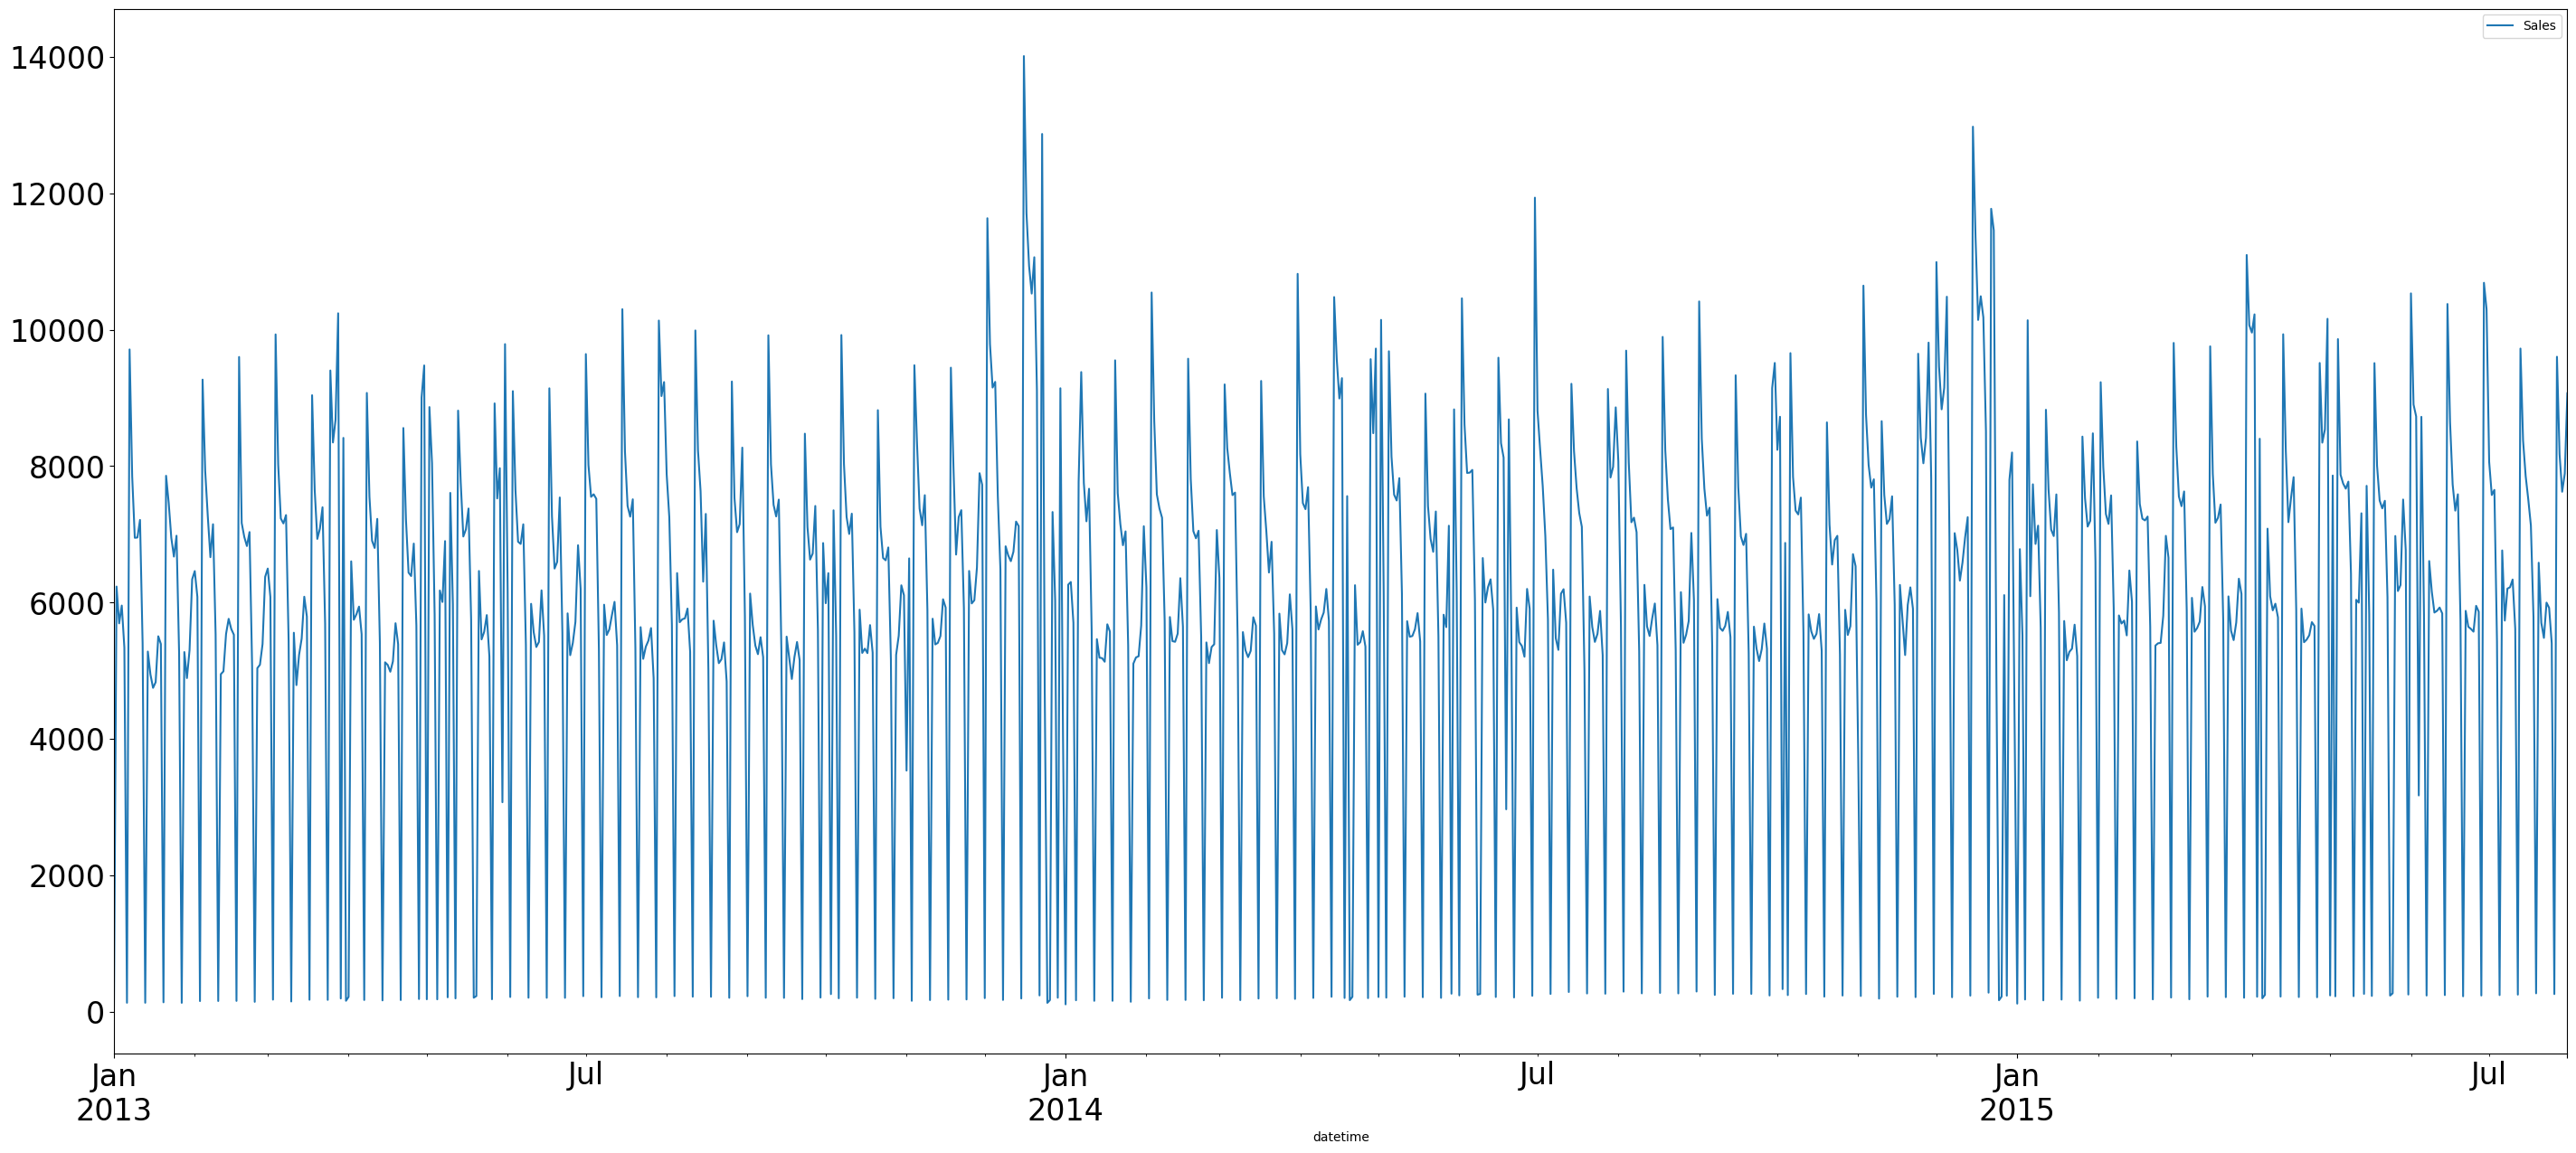

In [22]:
time_series_train_day = time_series_train.resample('D').mean()
time_series_train_day.plot(figsize=(35,15), fontsize=24)
plt.show()

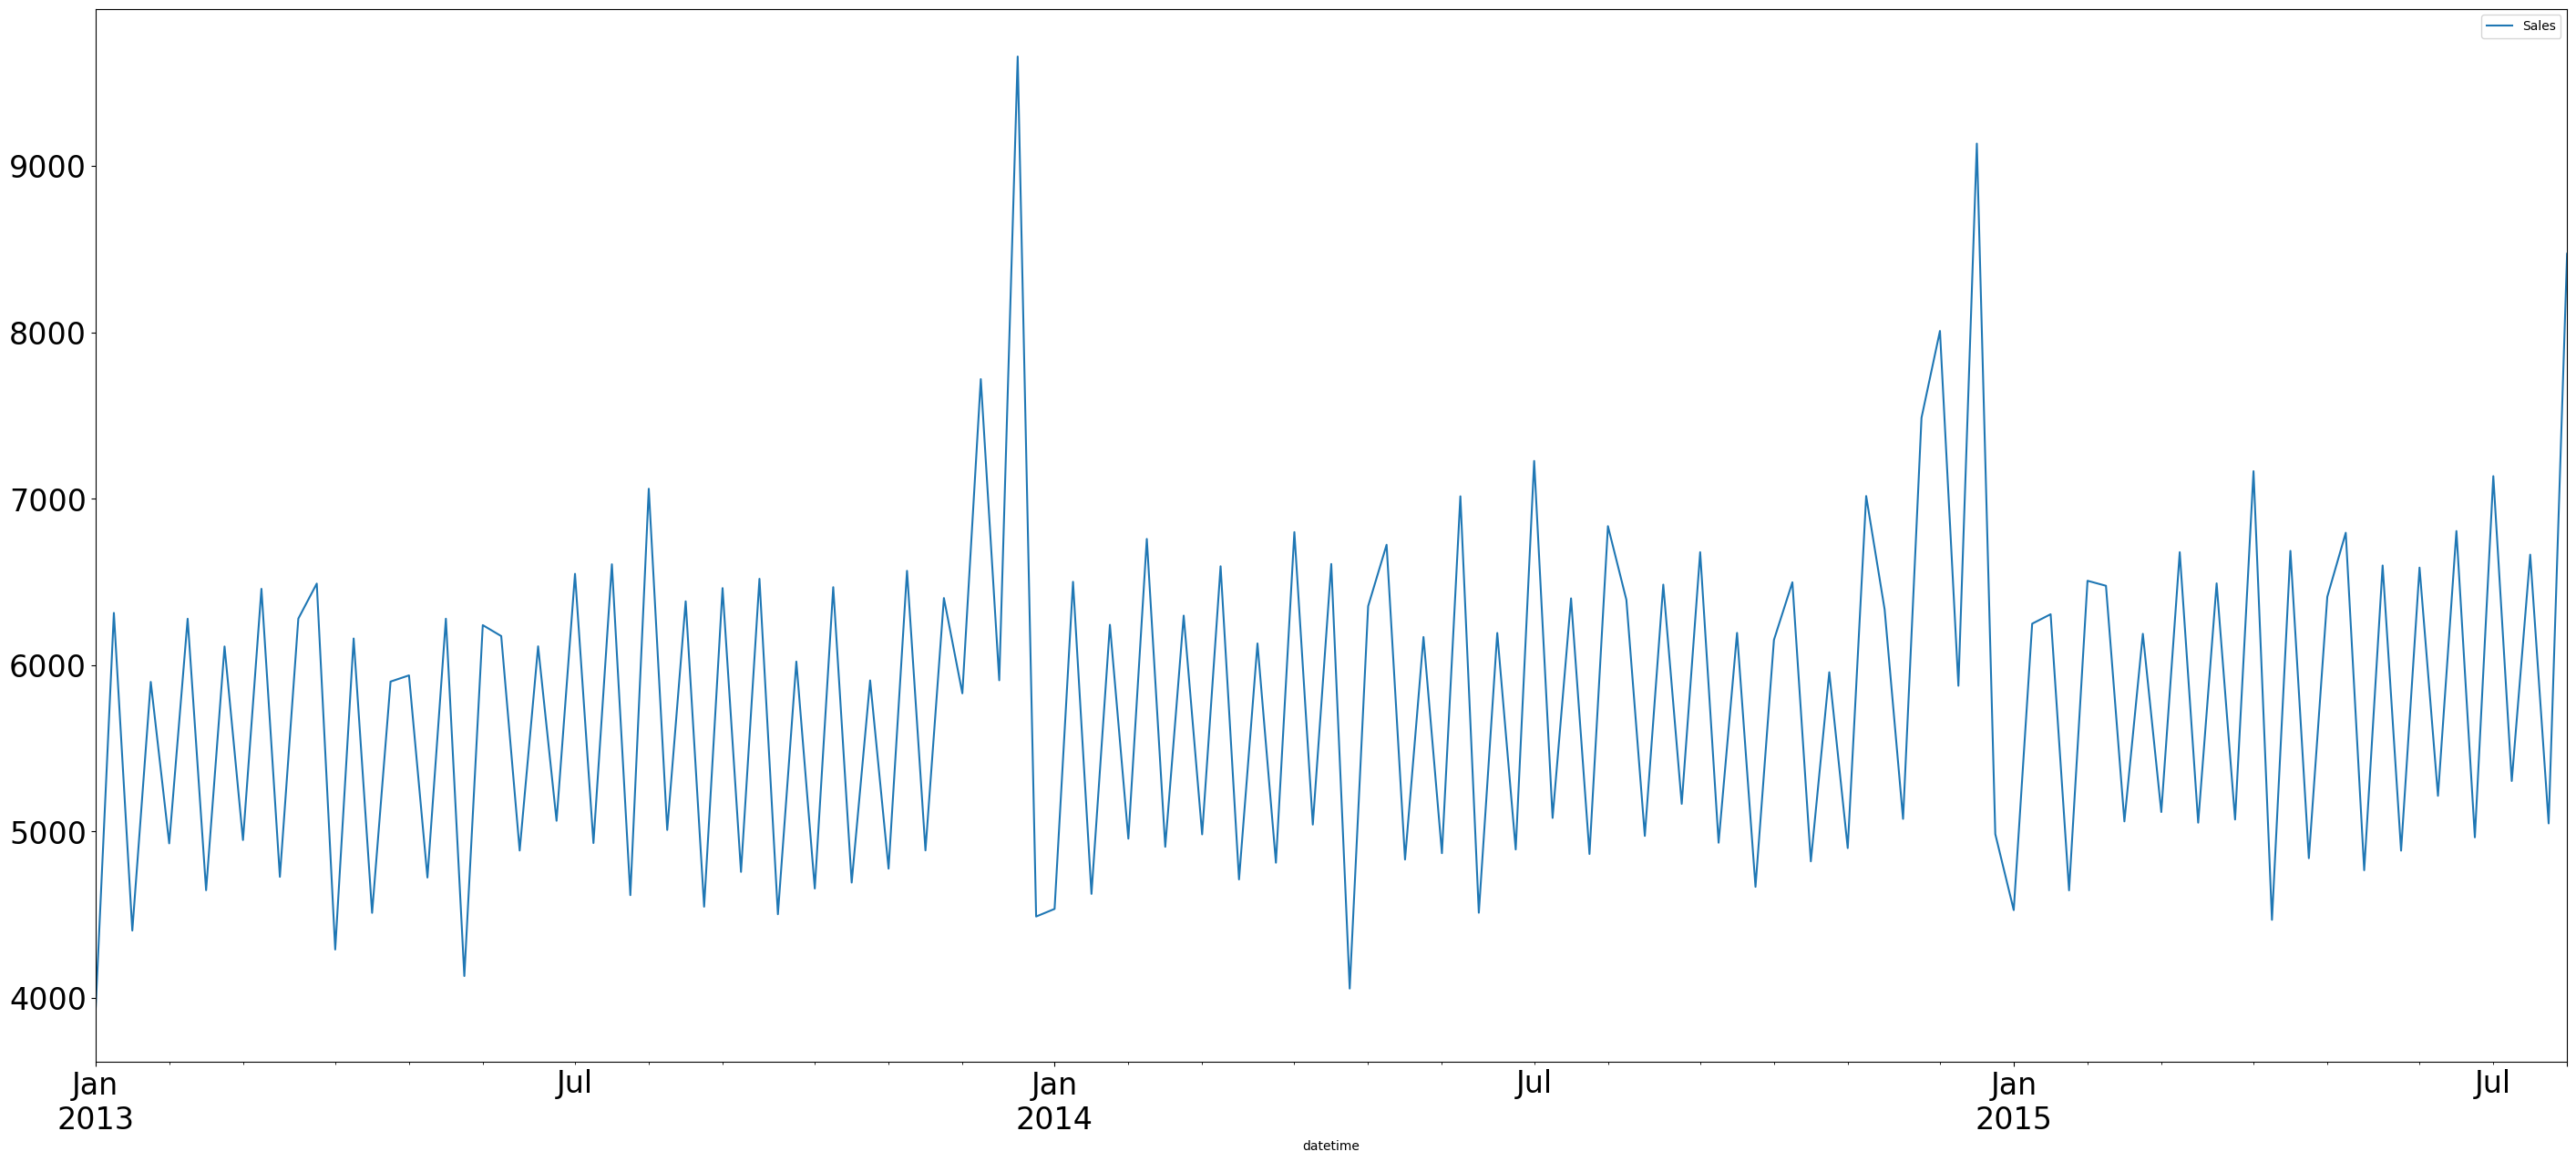

In [23]:
time_series_train_week = time_series_train.resample('W').mean()
time_series_train_week.plot(figsize=(35,15), fontsize=24)
plt.show()

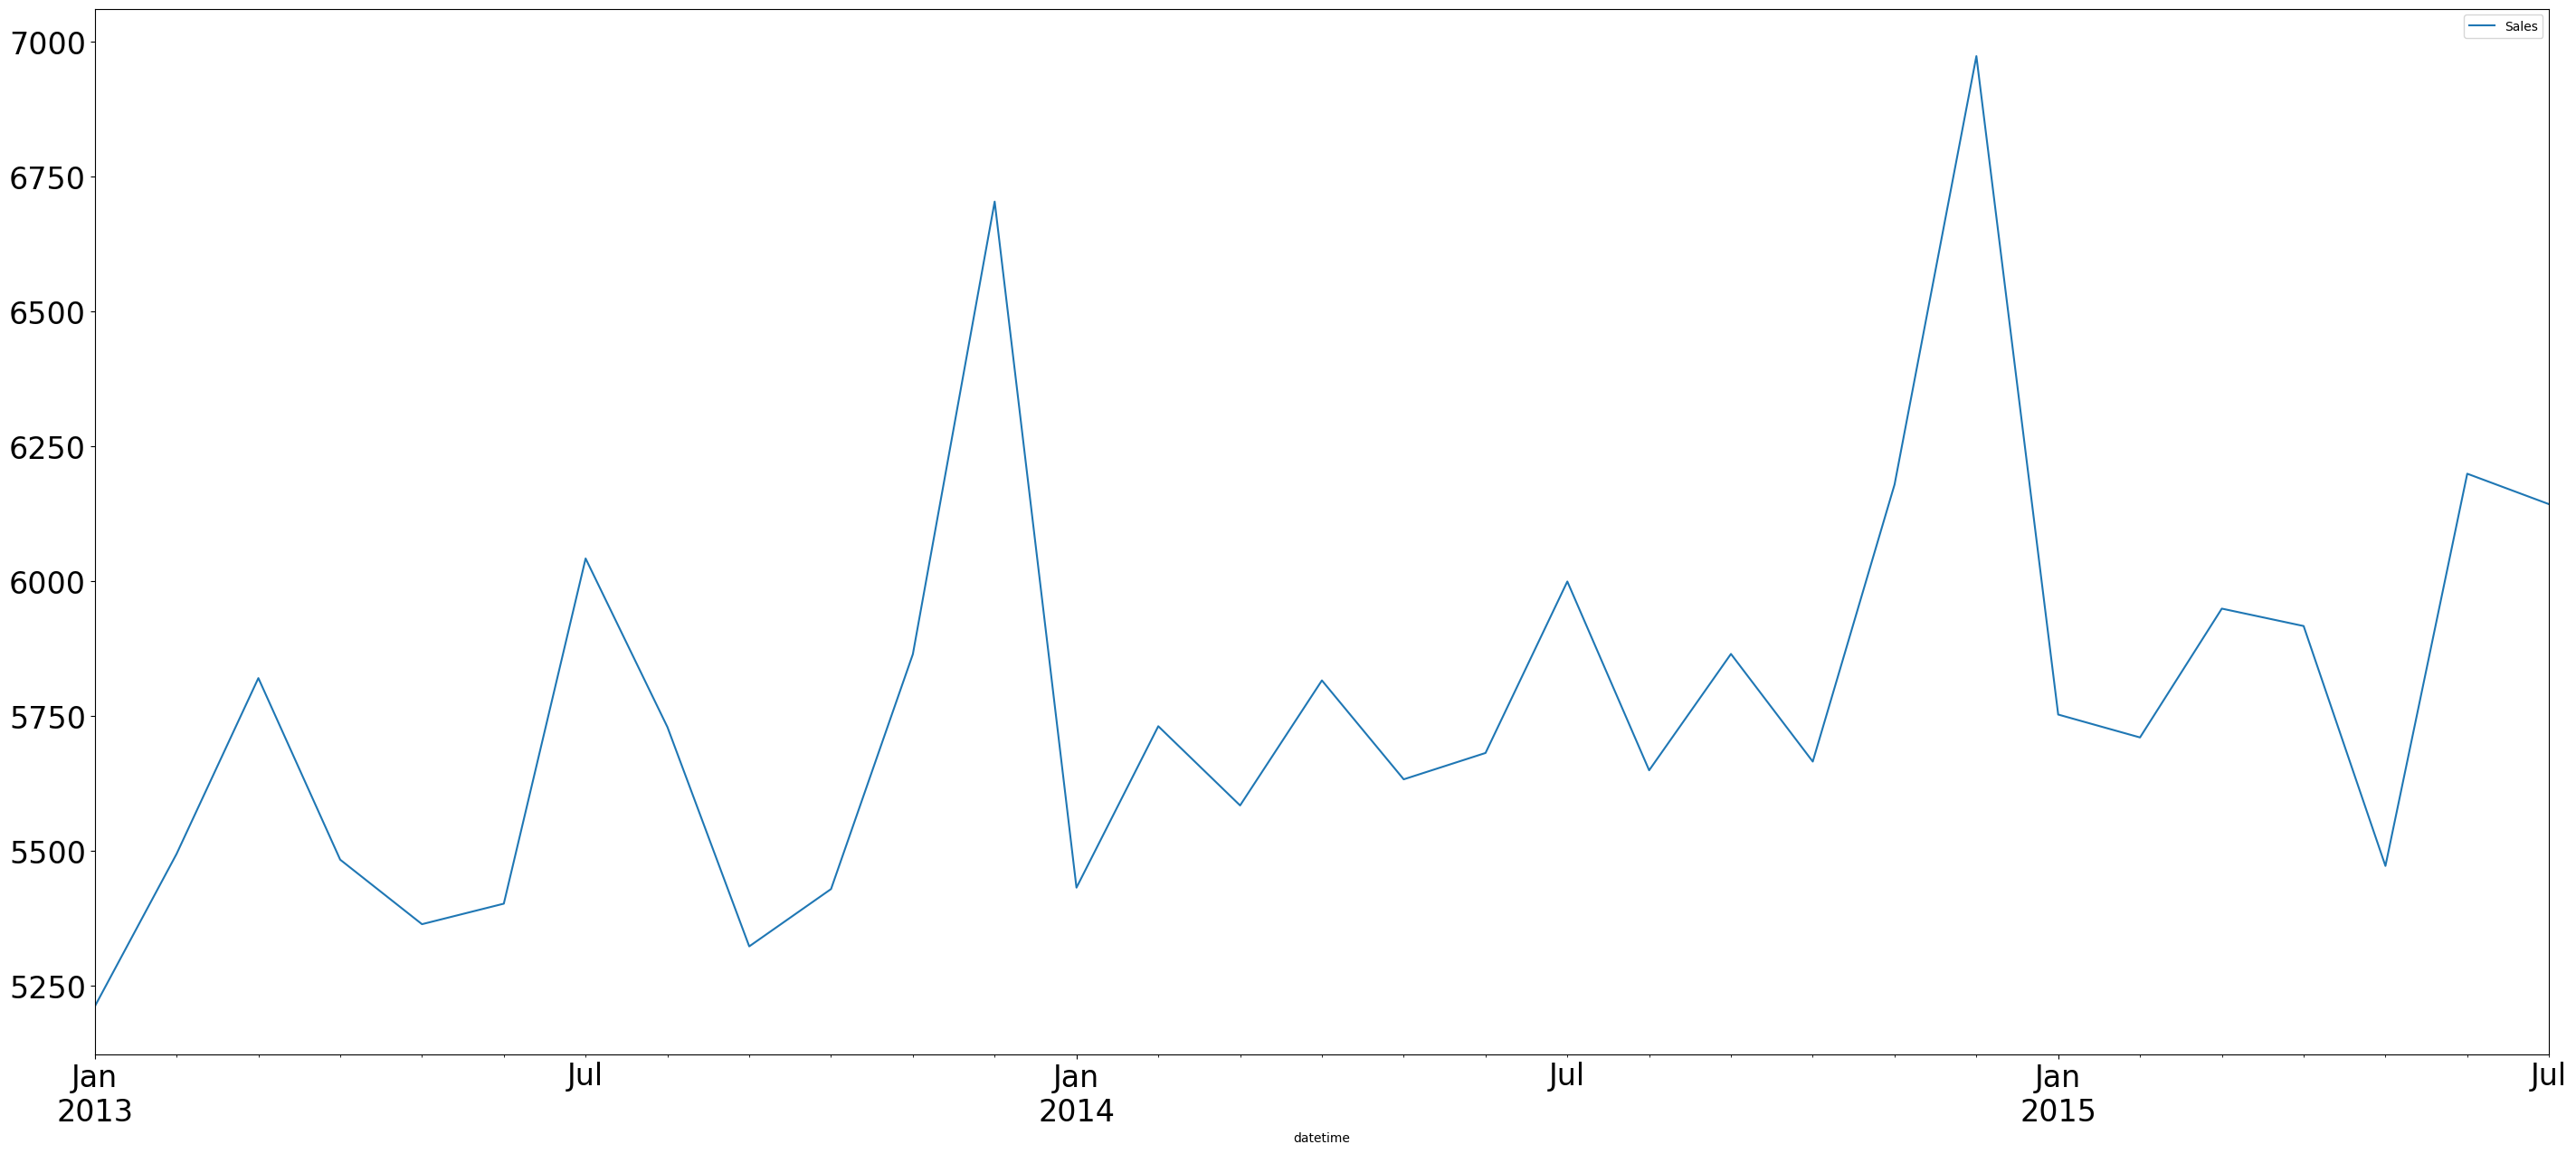

In [24]:
time_series_train_month = time_series_train.resample('M').mean()
time_series_train_month.plot(figsize=(35,15), fontsize=24)
plt.show()

** seasonality check of data series for test dataset **

In [63]:
# time_series_test = test_data[['Date','Sales']]
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


Note: I couldn't say anything about the similarity of the train and test datasets since the I can't see the Sales column in test and can't analyse the seasonality in test dataset from three graphs above we can see that the sales is peak on december 2013 and december 2014, for the reason that holidays are on december but as data scietist lets make it reasonable and data driven

# Check & compare sales behavior before, during and after holidays

In [87]:
# Create "Year", "Month" & "DayOfMonth" columns
train_data['Date']= pd.to_datetime(train_data['Date'], format= "%Y-%m-%d")
train_data["Year"] = train_data["Date"].apply(lambda x: x.year)
train_data["Month"] = train_data["Date"].apply(lambda x: x.month)
train_data["DayOfMonth"] = train_data["Date"].apply(lambda x: x.day)
train_data["WeekOfYear"] = train_data["Date"].apply(lambda x: x.weekofyear)

In [88]:
#lets extract the dataset for Chrismas holiday from train_data
chrismas_data = train_data[train_data['StateHoliday'] == "c"]
chrismas_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth,WeekOfYear
217,1,5,2014-12-26,0,0,0,0,c,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2014,12,26,52
218,1,4,2014-12-25,0,0,0,0,c,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2014,12,25,52
582,1,4,2013-12-26,0,0,0,0,c,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2013,12,26,52
583,1,3,2013-12-25,0,0,0,0,c,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2013,12,25,52
1159,2,5,2014-12-26,0,0,0,0,c,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2014,12,26,52


In [90]:
# Create "Year", "Month" & "DayOfMonth" columns
train_data['Date']= pd.to_datetime(train_data['Date'], format= "%Y-%m-%d")
train_data["Year"] = train_data["Date"].apply(lambda x: x.year)
train_data["Month"] = train_data["Date"].apply(lambda x: x.month)
train_data["DayOfMonth"] = train_data["Date"].apply(lambda x: x.day)
train_data["WeekOfYear"] = train_data["Date"].apply(lambda x: x.weekofyear)

In [86]:
c = '#386B7F' # basic color for plots

In [29]:
#lets extract the dataset for Chrismas holiday from train_data
chrismas_data = train_data[train_data['StateHoliday'] == "c"]
chrismas_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth,WeekOfYear
217,1,5,2014-12-26,0,0,0,0,c,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2014,12,26,52
218,1,4,2014-12-25,0,0,0,0,c,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2014,12,25,52
582,1,4,2013-12-26,0,0,0,0,c,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2013,12,26,52
583,1,3,2013-12-25,0,0,0,0,c,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2013,12,25,52
1159,2,5,2014-12-26,0,0,0,0,c,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2014,12,26,52


In [30]:
christmas_data = train_data[(train_data['Month'] == 12) |(train_data['Month'] == 1)]

christmas_data.shape

(167244, 22)

# What can you say about the correlation between sales and number of customers?

In [31]:
data_corr = train_data[['Store','Sales','Customers',]]

<Axes: >

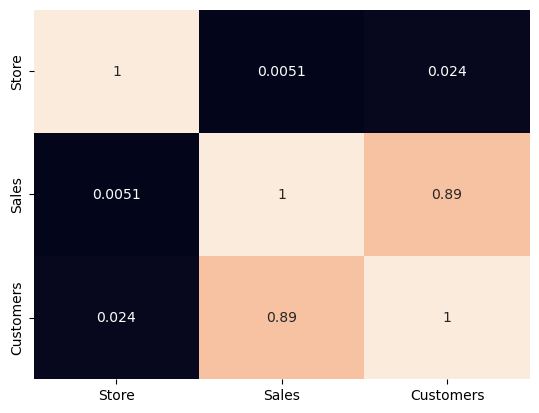

In [32]:
#correlation matrix
correlation = data_corr.corr()
sns.heatmap(correlation,annot = True,  cbar=False)

** Note: as we can see from the above figure there is strong correlation between sales and number of customer whith correllation of 0.89 **

# How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


In [33]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27,31


In [34]:
promo_sales = train_data[['Store','Promo','Promo2','Sales',"Customers"]]
promo_sales.head()

,Store,Promo,Promo2,Sales,Customers
0,1,1,0,5263,555
1,1,1,0,5020,546
2,1,1,0,4782,523
3,1,1,0,5011,560
4,1,1,0,6102,612


In [35]:
promo_sales[promo_sales['Promo'] ==1].Customers.sum()

318263948

In [36]:
promo_sales_grouped = promo_sales.groupby(["Promo"])[['Sales','Customers']].sum()
promo_sales_grouped

,Sales,Customers
Promo,,
0,2771974337,325777807
1,3101206286,318263948


In [37]:
sales0 = promo_sales_grouped.iloc[0,0]
sales1 = promo_sales_grouped.iloc[1,0]
cust0 = promo_sales_grouped.iloc[0,1]
cust1 = promo_sales_grouped.iloc[1,1]

In [38]:
percentage_change_sales = ((sales1 - sales0)/sales0) * 100
percentage_change_cust = ((cust1-cust0)/cust0) *100
print("Percentage increase in Sales is " + str(percentage_change_sales) + "%")
print("Percentage increase in Customer is " + str(percentage_change_cust) + "%")

Percentage increase in Sales is 11.877164395263302%
Percentage increase in Customer is -2.3064367303571416%


Text(0.5, 1.0, 'Promo vs Sales')

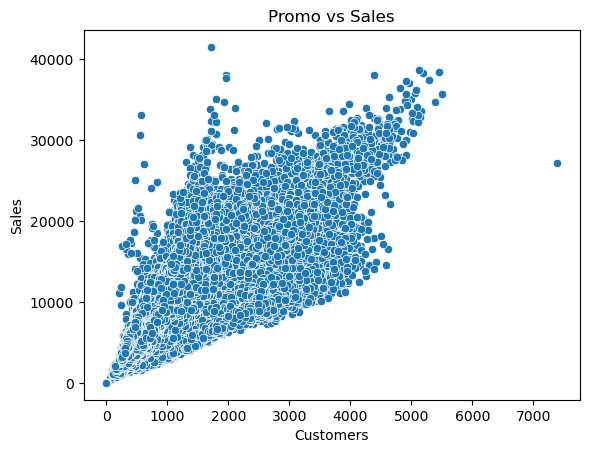

In [39]:
ax = sns.scatterplot(x='Customers', y="Sales",data=promo_sales )
ax.set_title('Promo vs Sales')

In [ ]:
ax = sns.scatterplot(x='Customers', y="Sales",hue="Promo",data=promo_sales )
ax.set_title('Promo vs Sales')

In [ ]:
sns.barplot(x='Promo', y="Sales", data=promo_sales )

Note: there is 11.877% increase during promotion on sales and therefore Promo while there is decress of 2.3% in customer

# Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [91]:
promos_store = train_data[['Store','StoreType','Promo','Sales','Customers']]

In [92]:
promos_store = promos_store.groupby(['StoreType',"Promo"]).\
                agg({'Store':"count","Sales":"sum","Customers":"sum"})
promos_store

Store       Sales  Customers
StoreType Promo                               
a         0      341123  1466971549  180276608
          1      210504  1698363310  183264826
b         0        9784    92061910   18685985
          1        6046    67169485   12779636
c         0       84596   375186657   47222206
          1       52244   408034769   44907499
d         0      193626   837754221   79593008
          1      119286   927638722   77311987

Note: as we can see from above table if we deploy promo in StoreType a we can both attract more customer and there is a huge increase in Sales relative to the other stores

# Trends of customer behavior during store open and closing times

since we have cleaned our data before lets bring the data again to see the customer behaviour during the store is open or closed

In [93]:
#bringing in the data again for this question sake
train_before_cleaning = pd.read_csv("train.csv")
train_before_cleaning.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [94]:
train_before_cleaning[train_before_cleaning['Open'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [95]:
data_open_state = train_before_cleaning[['Open','Customers']]
data_open_state = data_open_state.groupby(['Open']).agg({"Customers":'sum'})
data_open_state

,Customers
Open,
0,0
1,644041755


<Axes: xlabel='Open', ylabel='Customers'>

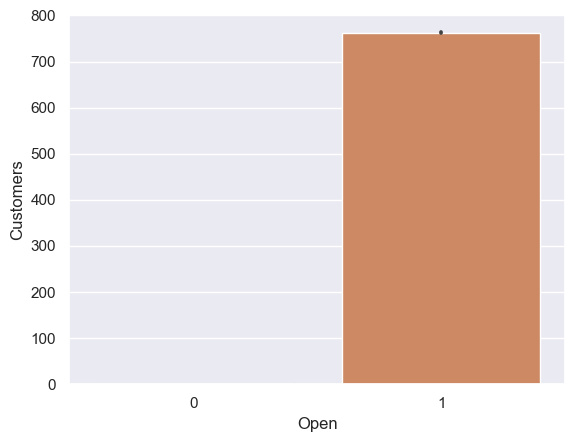

In [96]:
sns.barplot(x="Open",y='Customers', data=train_before_cleaning)

Note: from this the trends as expected when the Pharmaceutical is closed there is no customer, All the customer interacts with the pharmaceutical when it is opened

Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [97]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27,31


In [98]:
weekday_data = train_data[['Open', "DayOfWeek","StoreType",'Sales']]

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

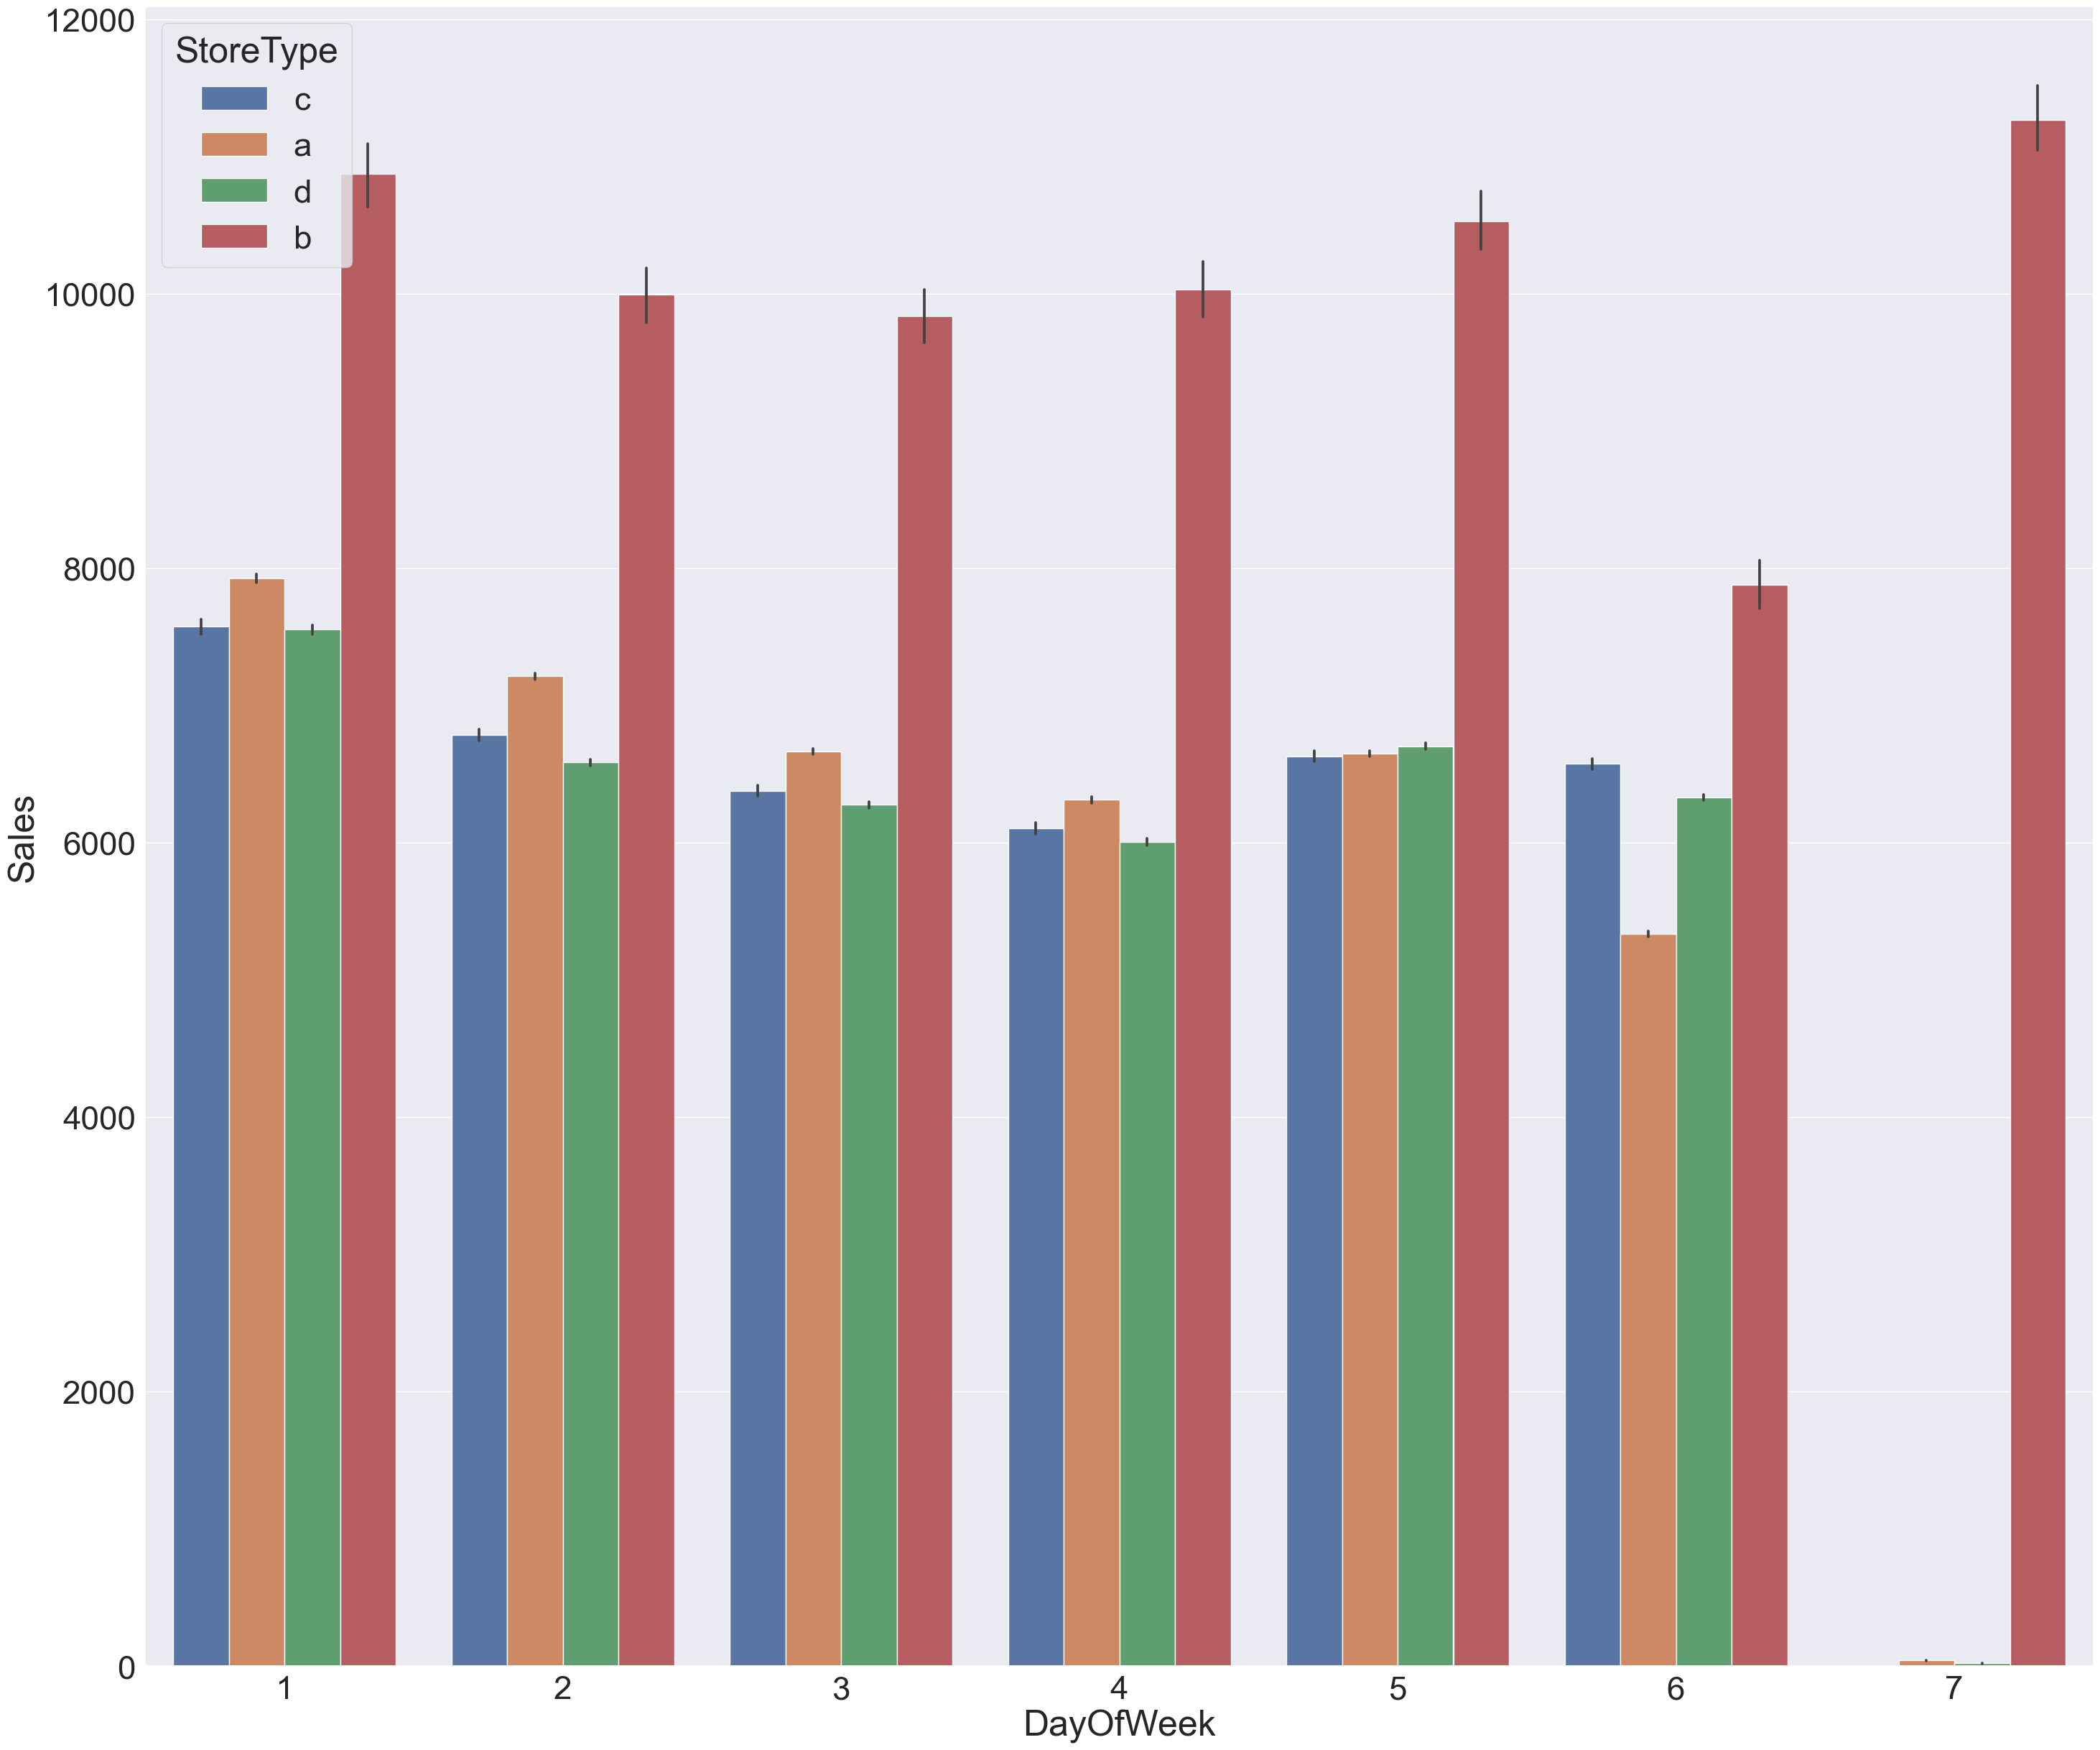

In [99]:
sns.set(font_scale=3)  
plt.figure(figsize=(35,30))
sns.barplot(x="DayOfWeek", y="Sales", hue="StoreType", data=weekday_data)

Note: from above figure we can see that all Store Types are working all weekdays except Store Type c. and the effect as seen on the 7th day from the figure above the Store Type c is kind have kind of low overall sales as shown in the figure below

In [100]:
weekday_data1 = train_data.groupby(['StoreType']).agg({"DayOfWeek":"count","Sales":'sum'})

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

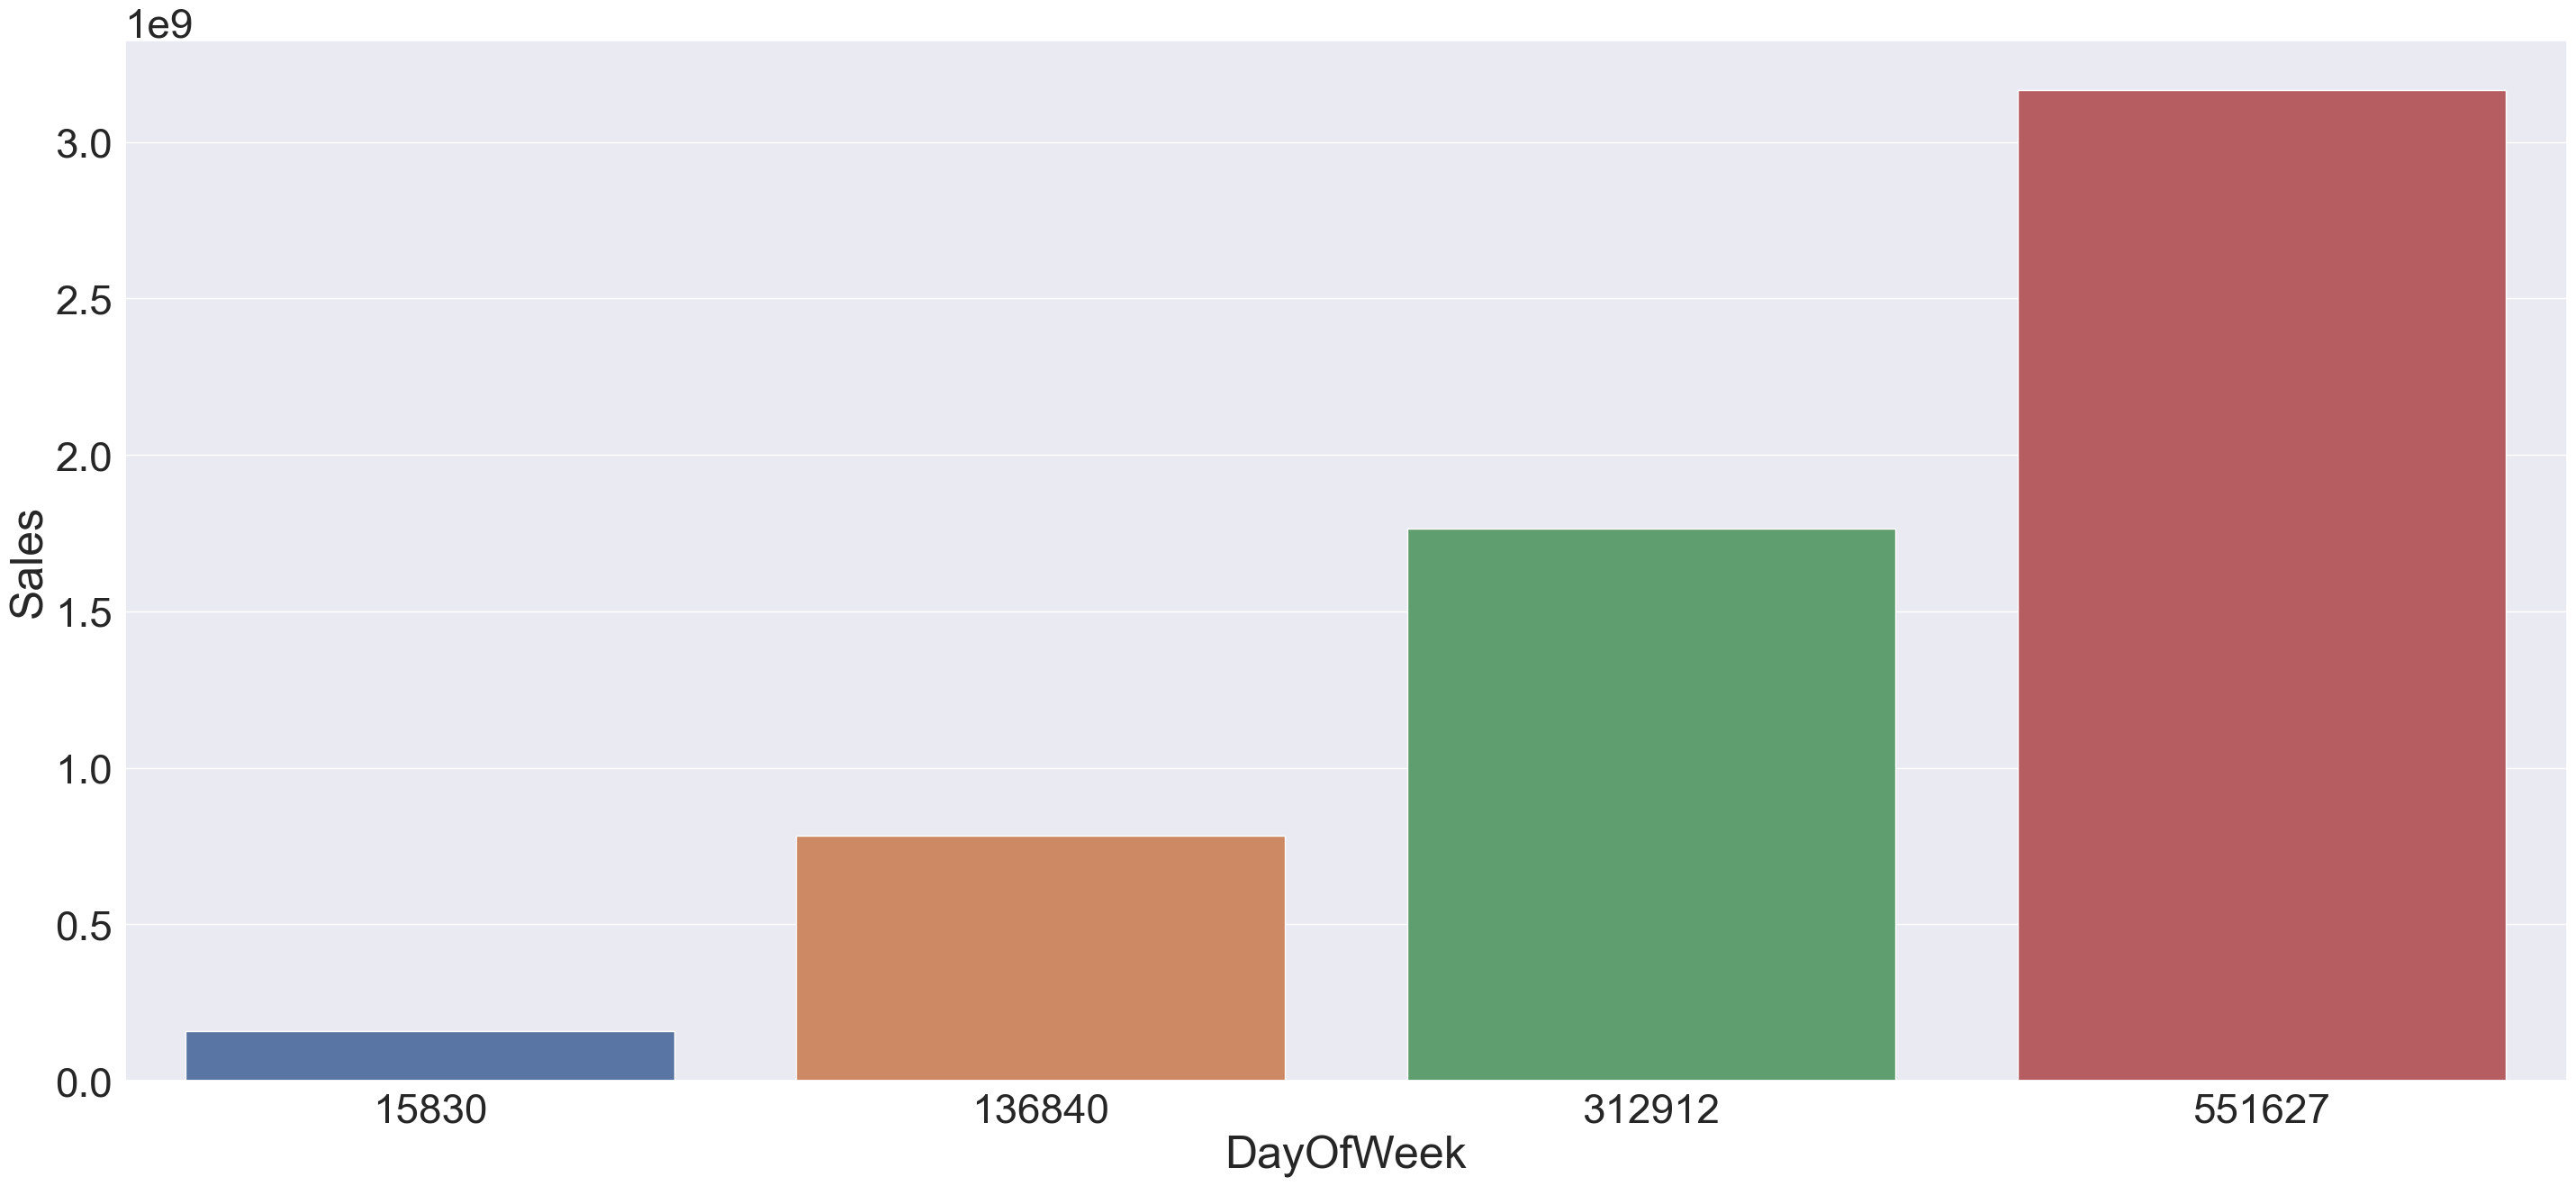

In [101]:
plt.figure(figsize=(35,15))
sns.barplot(x="DayOfWeek", y="Sales", data=weekday_data1)

# Check how the assortment type affects sales

In [102]:
# extractng Assortment data to be used for this analysis
assort_data = train_data[['Assortment','Sales']]

In [103]:
assort_data.nunique()

Assortment        3
Sales         21734
dtype: int64

<Axes: xlabel='Assortment', ylabel='Sales'>

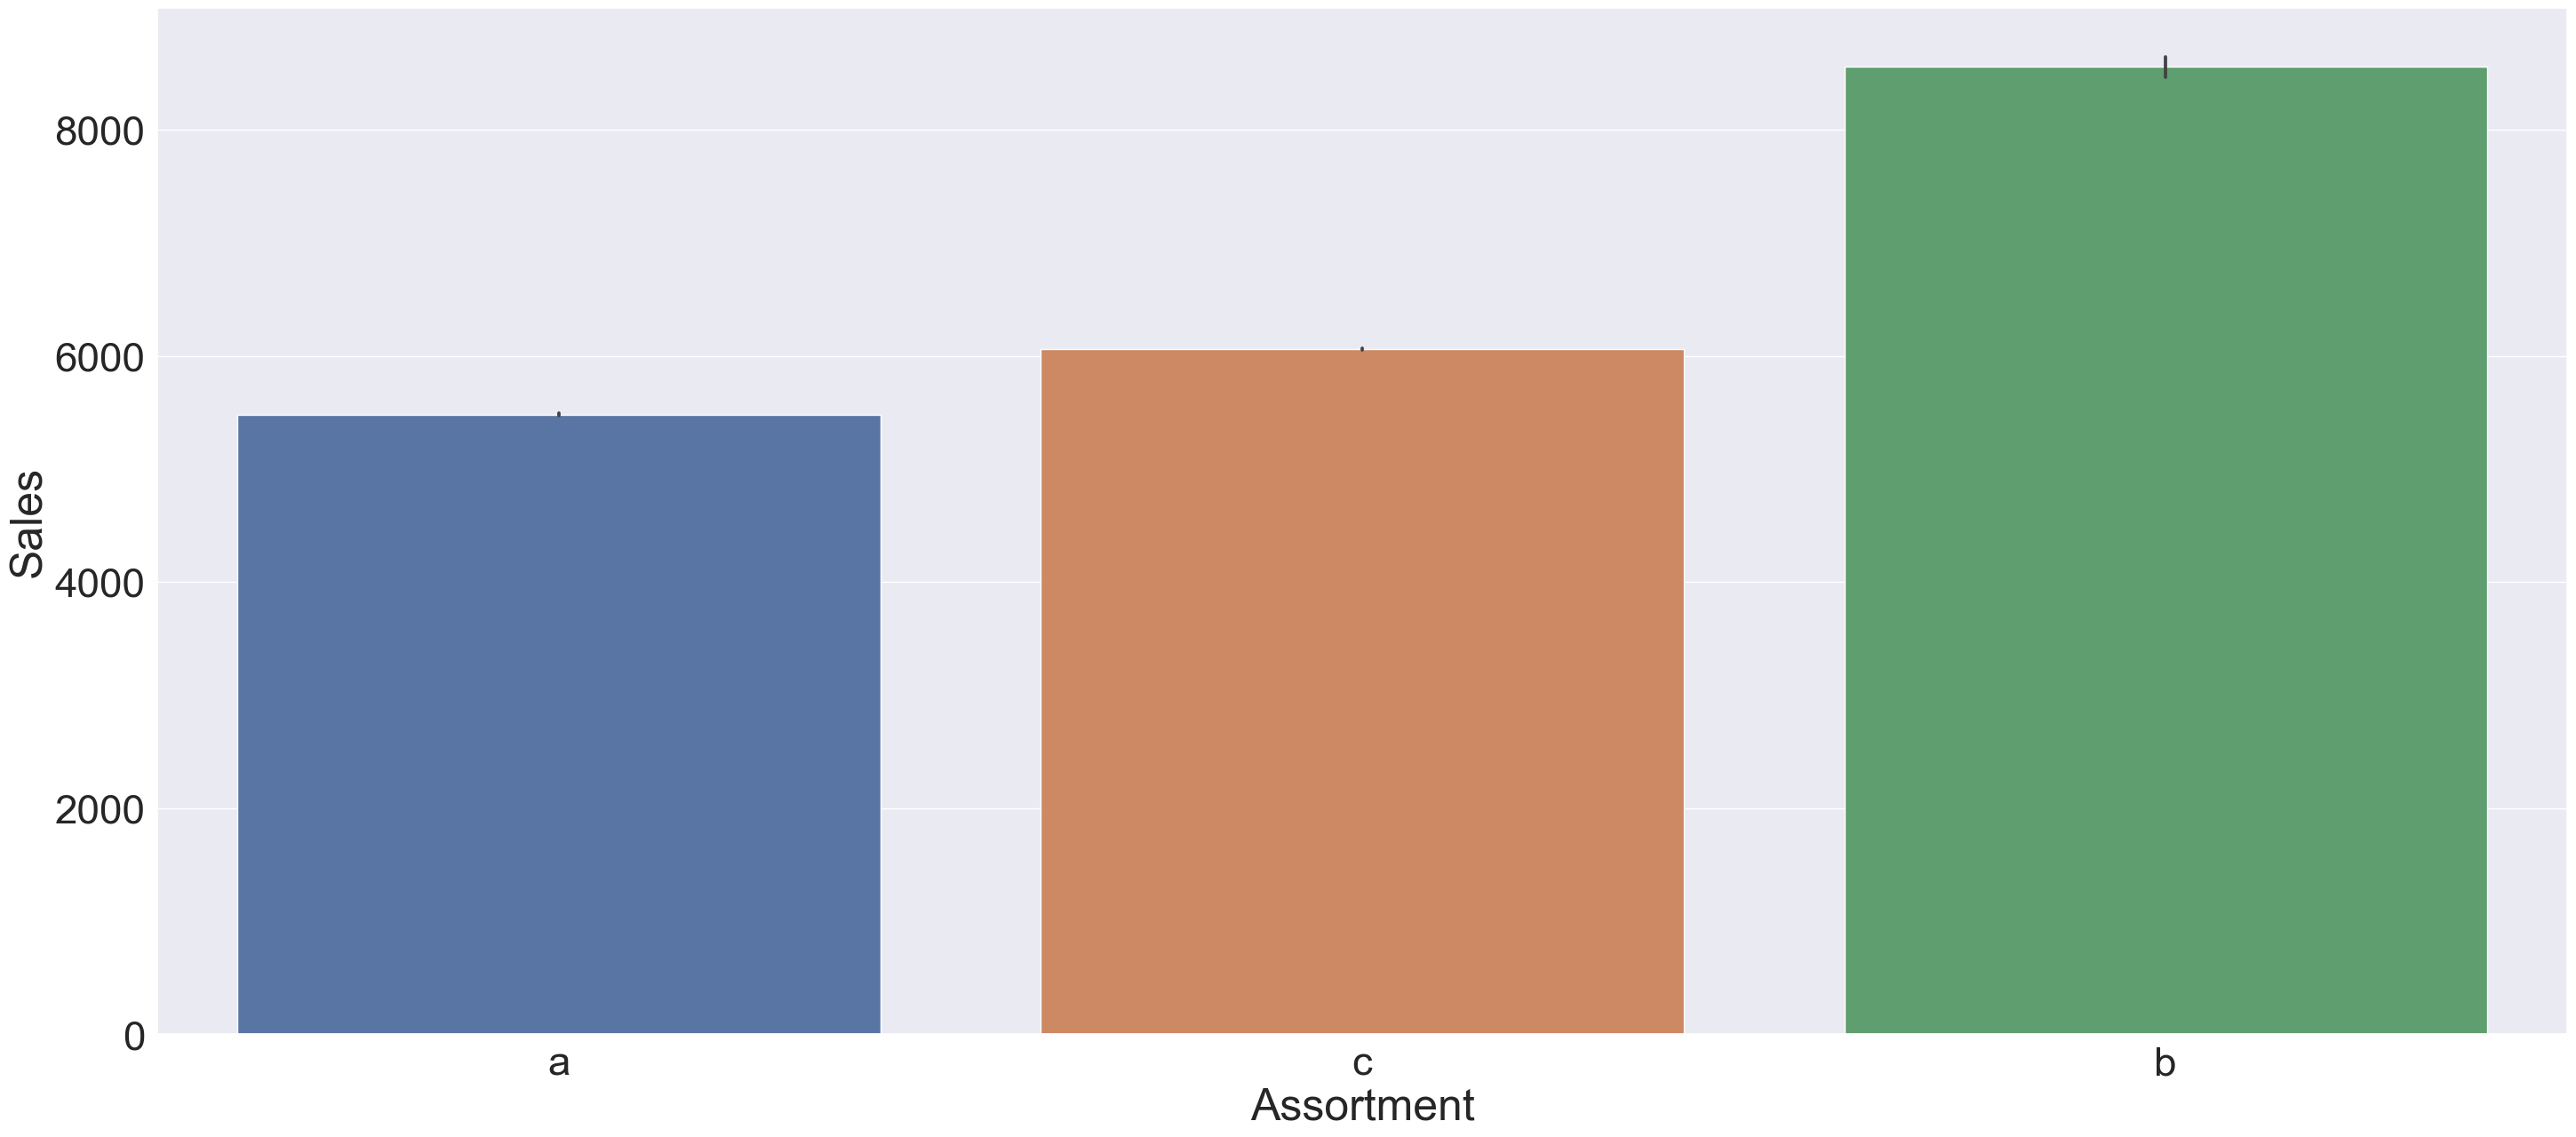

In [104]:
# visulazing the above data we use bar plot this Assortment is categorical
plt.figure(figsize=(35,15))
sns.barplot(x="Assortment", y="Sales", data=assort_data)

In [105]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27,31


# How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [106]:
distance_data = train_data[['CompetitionDistance','Sales']]
distance_data = distance_data.groupby(['CompetitionDistance']).agg({"Sales":"sum"})
distance_data.max()

Sales    76259307
dtype: int64

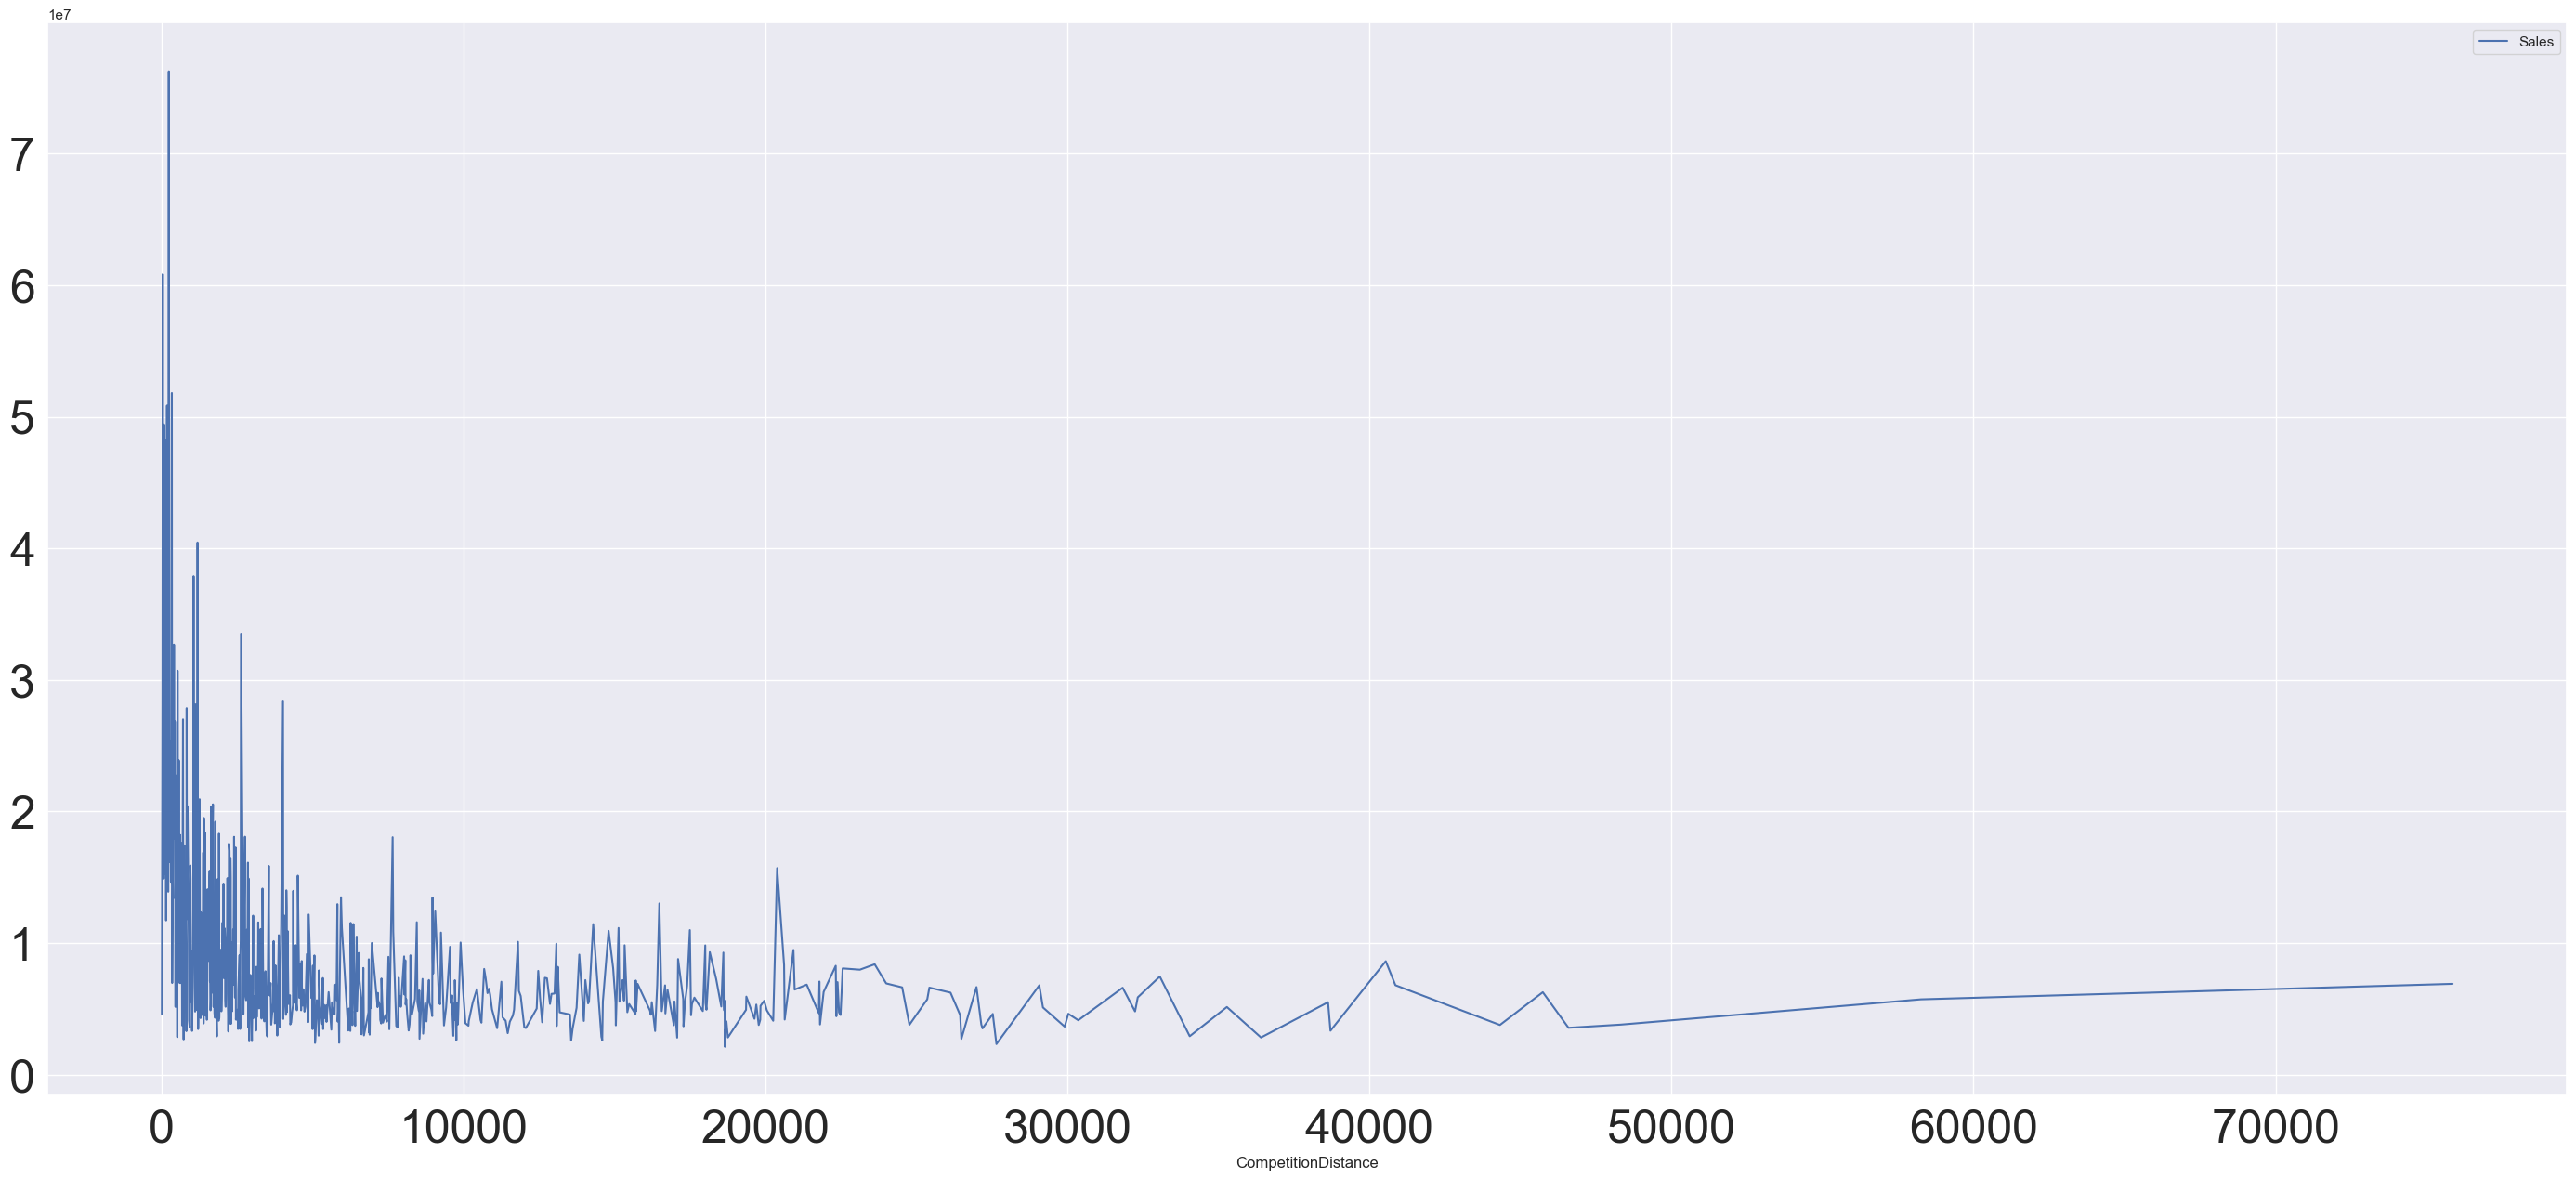

In [107]:
sns.set(font_scale=1)  

distance_data.plot(figsize=(35,15), fontsize=36)
plt.show()

The less the competition distance the more the sales and as the competion distance increases the sales decreases.